Εργαστήριο “Νευρωνικά Δίκτυα & Ευφυή Υπολογιστικά Συστήματα” 2018-2019
# Άσκηση 1. Επιβλεπόμενη μάθηση: Ταξινόμηση. Μελέτη datasets του UCI Machine Learning Repository

## Dataset S10: Statlog (Vehicle Silhouettes) Data Set 

# Στοιχεία Ομάδας





## Αριθμός Ομάδας --> B9

> 

1.   Καναβάκης Ελευθέριος 03114180
2.   Λιάρτης Ιάσον 03114161






# General Imports

In [0]:
!pip3 install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.4.3)


In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [0]:
# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn import preprocessing


# Εισαγωγή στο Dataset

Το dataset που μας δίνεται στην άσκηση αυτή περιγράφει τις σιλουέτες διάφορων οχημάτων . Για να επιτύχει την περιγραφή αυτή χρησιμοποιήθηκε το σύστημα HIPS (Hierarchical Image Processing System). Μάλιστα , θεωρούμε χρήσιμο να αναφέρουμε πως για την συλλογή των δεδομένων που μας δίνονται στο dataset αυτό τα οχήματα τοποθετήκαν σε ένα lightbox και βάφτηκαν όλα με το ίδιο χρώμα (matte black) έτσι ώστε να μην διαφέρουν ως προς το χαρακτηριστικό αυτό , το οποίο φυσικά είναι αρκετά σημαντικό . 

**Σκοπός** της άσκησης αυτής είναι να καταφέρουμε να ταξινομήσουμε το κάθε όχημα που μας δίνεται σαν είσοδο στην κατηγορία στην οποία ανήκει . Οι κατηγορίες στις οποίες ένα όχημα μπορεί να ταξινομηθεί είναι : Opel , Saab , Bus και Van .

**Το dataset** αποτελείται από 946 παραδείγματα από τα οποία τα 100 κρατούνται από την Strathclyde για επαλήθευση . Ως εκ τούτου , το dataset μας αποτελείται από **846 παραδείγματα** ! Παράλληλα , θεωρούμε σκόπιμο να αναφερθούμε και στα attributes του dataset μας . Τα attributes αυτά είναι συνολικά 18 . Επιπρόσθετα , δίνεται άλλη μία στήλη στο τέλος η οποία μας υποδηλώνει σε ποια κατηγορία ανήκει το κάθε όχημα ( πχ Opel ).  Για τα attributes αυτά θα δώσουμε περισσότερες πληροφορίες αργότερα !

### Επεξεργασία του dataset

Αρχικά , παρατηρούμε ότι το dataset μας δίνεται σε 9 διαφορετικά αρχεία .dat . Ως αποτέλεσμα , για να αξιοποιήσουμε τα αρχεία αυτά τα ενώσαμε (concatenate). Για να το επιτύχουμε αυτό χρησιμοποιήσαμε την εντολή : copy *.dat final.dat ( αφορά windows command line).  Στην συνέχεια , ελέγξαμε αν υπάρχουν τιμές που απουσιάζουν με την εντολή : findstr /V "?" final.dat > nomissing.final.dat (αφορά windows command line) . Ανοίγοντας το αρχείο nomissing.final.dat παρατηρήσαμε ότι δεν απουσιάζει καμία τιμή από το dataset μας. Τέλος , θεωρούμε σκόπιμο να αναφέρουμε ότι στο dataset που μας δίνεται δεν υπάρχουν ούτε επικεφαλίδες ούτε αρίθμηση γραμμών !

Στο σημείο αυτό λοιπόν θα ανεβάσουμε το ενωποιημένο αρχείο final.dat που περιέχει το dataset μας!

In [0]:
# let's upload our dataset from local pc , dataset's name is final.dat
from google.colab import files
files.upload()

Saving final.dat to final.dat


{'final.dat': b'95 48 83 178 72 10 162 42 20 159 176 379 184 70 6 16 187 197 van \n91 41 84 141 57 9 149 45 19 143 170 330 158 72 9 14 189 199 van \n104 50 106 209 66 10 207 32 23 158 223 635 220 73 14 9 188 196 saab\n93 41 82 159 63 9 144 46 19 143 160 309 127 63 6 10 199 207 van \n85 44 70 205 103 52 149 45 19 144 241 325 188 127 9 11 180 183 bus \n107 57 106 172 50 6 255 26 28 169 280 957 264 85 5 9 181 183 bus \n97 43 73 173 65 6 153 42 19 143 176 361 172 66 13 1 200 204 bus \n90 43 66 157 65 9 137 48 18 146 162 281 164 67 3 3 193 202 van \n86 34 62 140 61 7 122 54 17 127 141 223 112 64 2 14 200 208 van \n93 44 98 197 62 11 183 36 22 146 202 505 152 64 4 14 195 204 saab\n86 36 70 143 61 9 133 50 18 130 153 266 127 66 2 10 194 202 van \n90 34 66 136 55 6 123 54 17 118 148 224 118 65 5 26 196 202 saab\n88 46 74 171 68 6 152 43 19 148 180 349 192 71 5 11 189 195 bus \n89 42 85 144 58 10 152 44 19 144 173 345 161 72 8 13 187 197 van \n94 49 79 203 71 5 174 37 21 154 196 465 206 71 6 2 

Για να ελέγξουμε αν το dataset μας ανέβηκε επιτυχώς θα πραγματοποιήσουμε ένα απλό ls .

In [0]:
# let's check that our file has been uploaded sucessfully
!ls 

final.dat  sample_data


Για να διαβάσουμε το input μας θα χρησιμοποιήσουμε το pandas.

In [0]:
import pandas as pd

Πριν διαβάσουμε το αρχείο μας θα προσθέσουμε τα headers των στηλών σε ένα πίνακα . Όπως είπαμε και παραπάνω το dataset μας έχει 18 features και η τελευταία στήλη μας δίνει την κατηγορία στην οποία ανήκει το όχημα ! Στην συνέχεια , παρατηρήσαμε ότι στο dataset μας τα δεδομένα μπορεί διαχωρίζονται με spaces . Βέβαια , επειδή τα spaces αυτά δεν είναι απαραίτητα ένα για κάθε διαχωρισμό δώσαμε στον separator το '\s+' για να γίνεται ο διαχωρισμός με ένα ή περισσότερα spaces!

In [0]:
# let's write our headers
headers = ["compactness","circularity","dst circularity","radius ratio","pr.axis aspratio","maxlength aspratio","scatter ratio","elongatedness","praxis rectangularity","maxlength rectangularity","scaled variancemaj","scaled variancemin","scaled radius of guration","skewness aboutmaj","skewness aboutmin","kurtosis aboutmin","kurtosis aboutmaj","hollows ratio","type"]

# now let's read our file
dt = pd.read_csv('final.dat', sep='\s+',header=None,names = headers)


# let's keep a copy of the dataset
data = dt 

# in order to extract the features we drop last column
dt = dt.drop(labels='type', axis=1)

Το dataset μας έχει την παρακάτω μορφη .

In [0]:
data.head()

,compactness,circularity,dst circularity,radius ratio,pr.axis aspratio,maxlength aspratio,scatter ratio,elongatedness,praxis rectangularity,maxlength rectangularity,scaled variancemaj,scaled variancemin,scaled radius of guration,skewness aboutmaj,skewness aboutmin,kurtosis aboutmin,kurtosis aboutmaj,hollows ratio,type
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


Παρατηρόντας τον παραπάνω πίνακα είναι εμφανές ότι το dataset μας δεν διαθέτει μη διατεταγμένα  χαρακτηριστικά ! Το μόνο το οποίο είναι μη διατεταγμένο είναι ο τύπος του κάθε οχήματος , δηλαδή το target . Το γεγονός αυτό όμως είναι απόλυτα φυσιολογικό και δεν μας επιρεάζει με κάποιο τρόπο στην συνέχεια της άσκησης μας !

Στο σημείο αυτό θα μελετήσουμε την ισορροπία του dataset μας ως προς την κανανομή στις διάφορες κλάσεις . Όπως είδαμε και παραπάνω, έχουμε συνολικά 4 κλάσεις . Στο σημείο αυτό , θα μετρήσουμε τις συνολικές εμφανήσεις τις κάθε κλάσης στα δείγματα μας .

In [0]:
stats = data["type"].value_counts()

buses = (stats.values[0]/846)*100
saabs = (stats.values[1]/846)*100
opels = (stats.values[2]/846)*100
vans = (stats.values[3]/846)*100

print("Frequency of buses is " +str(buses)+ " %.")
print("Frequency of saabs is " +str(saabs)+ " %.")
print("Frequency of opels is " +str(opels)+ " %.")
print("Frequency of vans is " +str(vans)+ " %.")

Frequency of buses is 25.768321513002363 %.
Frequency of saabs is 25.65011820330969 %.
Frequency of opels is 25.059101654846334 %.
Frequency of vans is 23.52245862884161 %.


Από τα παραπάνω συμπαιρένουμε ότι τα bus , saab και opel έχουν παρόμοια κατανομή ενώ τα van εμφανίζονται λίγο λιγότερο από τα υπόλοιπα αλλά όχι σε σημείο που να διαταράσει την ισσοροπία του dataset . Ως εκ τούτου , το dataset μας είναι **ισορροπημένο** . Ο λόγος τώρα για τον οποίο τα van είναι λίγο λιγότερα από τα άλλα 3 είναι γιατί ήταν δύσκολο να περιοριστούν τα van στο lightbox υπο συγκεκριμένες γωνίες .

Στην συνέχεια , θα διαχωρίσουμε τα δεδομένα μας σε labels και features .

In [0]:
# organize our data

feature_names = dt.columns.values
features = dt.values
label_names = ["opel","saab","van","bus"]
labels = data["type"].values

## Σχετικά με τα features

Τα ονόματα των features του dataset μας είναι :

In [0]:
print(feature_names)

['compactness' 'circularity' 'dst circularity' 'radius ratio'
 'pr.axis aspratio' 'maxlength aspratio' 'scatter ratio' 'elongatedness'
 'praxis rectangularity' 'maxlength rectangularity' 'scaled variancemaj'
 'scaled variancemin' 'scaled radius of guration' 'skewness aboutmaj'
 'skewness aboutmin' 'kurtosis aboutmin' 'kurtosis aboutmaj'
 'hollows ratio']


Ο αριθμός των features όπως είπαμε και παραπάνω είναι 18 ! Τα παραπάνω features περιλαμβάνουν μετρήσεις σχετικά με διάφορες επιφάνειες των αυτοκινήτων και γωνίες που αφορούν τις επιφάνειες αυτές !

In [0]:
print(feature_names.shape)

(18,)


  Τέλος , ο τύπος των τιμών που έχουν τα features είναι ακέραιοι αριθμοί .

In [0]:
print(features.dtype)

int64


## Σχετικά με τα labels

Τα ονόματα των labels όπως είπαμε και παραπάνω είναι :

In [0]:
print(label_names)

['opel', 'saab', 'van', 'bus']


### Διαχωρισμός του dataset σε train και test με ποσοστό test set 20%

In [0]:
from sklearn.model_selection import train_test_split

# Split our data with 20 % test set 
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2)

# Baseline classification

## Υλοποιήση dummy classifier

Αρχικά θα χρησιμοποιήσουμε τον dummy classifier για το dataset μας . Στο ερώτημα αυτό δεν θα προσδιορίσουμε κάποια στρατηγική για να ακολουθήσει ο classifier αυτός . Έτσι , η στρατηγική που θα ακολουθήσει ο classifier είναι η default , δηλαδή η stratified !



In [0]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier()

# με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
model = dc.fit(train, train_labels)

# με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
preds = dc.predict(test)


Στην συνέχεια θα τυπώσουμε τον confusion matrix για τις παραπάνω προβλέψεις .

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools 

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5,5))
    plt.grid(b=0)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


 Confusion Matrix for default dummy classifier ! 



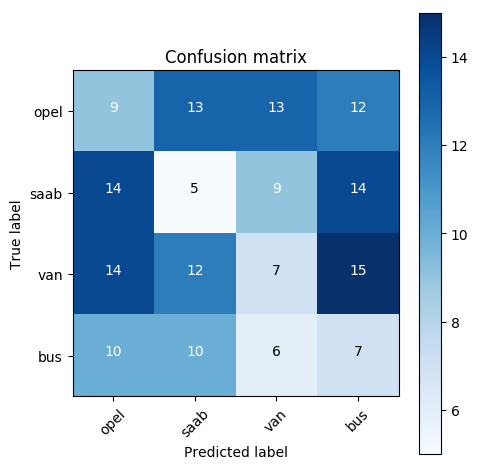

In [0]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, preds)
print("\n","Confusion Matrix for default dummy classifier !","\n")
# print confusion matrix
plot_confusion_matrix(cnf_matrix,label_names)

Στην συνέχεια θα χρησιμοποιούμε και το ($F_1$) score, το οποίο είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης.
$$F1 = 2\frac{P \times R}{P+R}$$  


Πιο συγκεκριμένα θα υπολογίσουμε τις μεταβλητές f1_micro και f1_macro .

In [0]:
from sklearn.metrics import precision_recall_fscore_support

# υπολογίζουμε το F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
temp = precision_recall_fscore_support(test_labels, preds, average='micro')
f1_micro = temp[2]
temp1 = temp
print("F1 micro for dummy classifier is --> " +str(f1_micro)+ " .")

# υπολογίζουμε το F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
temp = precision_recall_fscore_support(test_labels , preds, average='macro')
f1_macro = temp[2]
temp2 = temp
print("F1 macro for dummy classifier is --> " +str(f1_macro)+ " .")

F1 micro for dummy classifier is --> 0.16470588235294117 .
F1 macro for dummy classifier is --> 0.16373869654558573 .


## Υλοποιήση kNN classifier

Στην συνέχεια θα χρησιμοποιήσουμε τον kNN  (k Nearest Neighbors ) classifier ο οποίος χρησιμοποιεί μια ευριστική (ευκλίδεια απόσταση) και ανταγωνιστική μάθηση για να διαχωρίσει το test set στις κατάλληλες κλάσεις . Όπως και παράπανω δεν δώσαμε κάποιο όρισμα στο initialization του classifier αυτου!

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()

knn.fit(train, train_labels)

pred = knn.predict(test)

print(accuracy_score(test_labels, pred))

0.6705882352941176


Στην συνέχεια θα τυπώσουμε τον confusion matrix για τις παραπάνω προβλέψεις .


 Confusion Matrix for default kNN classifier ! 



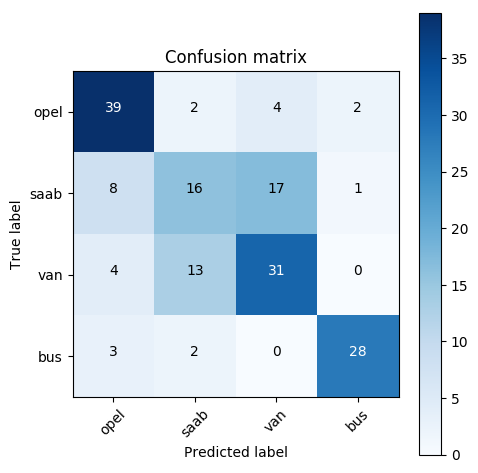

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, pred)
print("\n","Confusion Matrix for default kNN classifier !","\n")
plot_confusion_matrix(cnf_matrix,label_names)

Tέλος , θα υπολογίσουμε και τις μετρικές f1_micro και f1_macro για τον kNN classifier .

In [0]:
# υπολογίζουμε το F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
temp = precision_recall_fscore_support(test_labels, pred, average='micro')
f1_microknn = temp[2]
temp3 = temp
print("F1 micro for kNN classifier is --> " +str(f1_microknn)+ " .")

# υπολογίζουμε το F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
temp = precision_recall_fscore_support(test_labels , pred, average='macro')
f1_macroknn = temp[2]
print("F1 macro for kNN classifier is --> " +str(f1_macroknn)+ " .")

F1 micro for kNN classifier is --> 0.6705882352941176 .
F1 macro for kNN classifier is --> 0.6734859735973597 .


## Bar plots και σύντομος σχολιασμός 

### F1 micro average

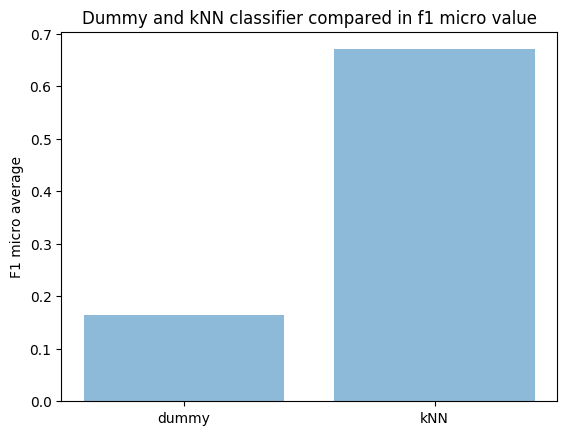

In [0]:

plt.rcdefaults()

classifiers = ('dummy','kNN')
y_pos = np.arange(len(classifiers))
performance = [f1_micro , f1_microknn]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.ylabel('F1 micro average')
plt.title('Dummy and kNN classifier compared in f1 micro value')
 
plt.show()

### F1 macro average

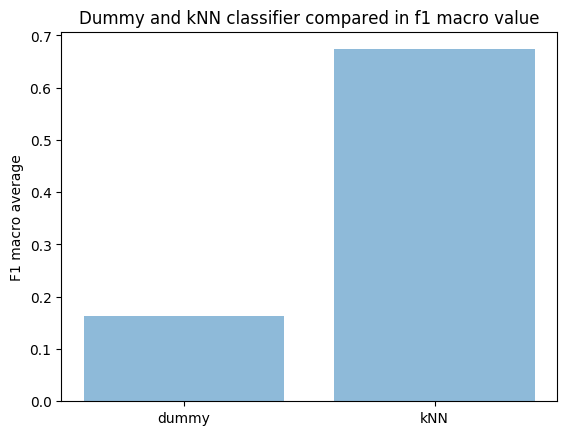

In [0]:
import matplotlib.pyplot as plt
plt.rcdefaults()

classifiers = ('dummy','kNN')
y_pos = np.arange(len(classifiers))
performance = [f1_macro , f1_macroknn]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.ylabel('F1 macro average')
plt.title('Dummy and kNN classifier compared in f1 macro value')
 
plt.show()

### Σχολιασμός

Από τις παραπάνω γραφικές παραστάσεις εύκολα καταλαβαίνει κανείς ότι ο kNN classifier έχει πολύ καλύτερο F1 score από τον dummy classifier . Αυτό εν μέρη είναι φυσιολογικό καθώς το dataset μας είναι ισορροπημένο και έτσι ο dummy classifier δυσκολεύεται να κάνει σωστή πρόβλεψη . Αντίθετα ο kNN classifier , ο οποίο είναι αρκετά πιο "έξυπνος" από τον dummy χρησιμοποιώντας ευριστικές συναρτήσεις για να ταξινομήσει ( euclidean distance ) έχει πολύ καλύτερα αποτελέσματα όσον αναφορά την σωστή ταξινόμηση των οχημάτων στις ανάλογες κλάσεις . 

Τέλος , πριν προχωρήσουμε στο μέρος Δ θα τυπώσουμε και τις μετρικές ακρίβεια (P)  και ανάκληση (R) . Πιο συγκεκριμένα oρίζουμε :
Ακρίβεια -Precision- ($P$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false positives ($F_p$).
$$P = \frac{T_p}{T_p+F_p}$$
Ανάκληση -Recall- ($R$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives ($F_n$).
$$R = \frac{T_p}{T_p + F_n}$$

In [0]:
!pip3 install texttable

Στην συνέχεια ορίζουμε την συνάρτηση printTable η οποία μας επιτρέπει να τυπώνουμε τα αποτελέσματα μας στην μορφή table !

In [0]:
def printTable(headers,Classifiers,Recall,Precision,F1):
  
  import texttable as tt
  tab = tt.Texttable()
  tab.header(headers)
  
  for row in zip(Classifiers,Recall,Precision,F1):
    tab.add_row(row)

  s = tab.draw()
  print (s)
  return
  

Τέλος , καλούμε την συνάρτηση printTable για να τυπώσουμε τις μετρικές μας. Για τον κάθε classifier έχουμε 2 entries , μία για micro averaged metrics και μια για macro averaged metrics !

In [0]:

headings = ['Classifiers','Recall','Precision','F1']
Classifiers= ['Dummy (micro)', 'Dummy (macro)', 'kNN (micro)','kNN (macro)']
Recall = [temp1[1],temp2[1],temp3[1],temp[1]]
Precision = [temp1[0],temp2[0],temp3[0],temp[0]]
F1 = [f1_micro,f1_macro,f1_microknn,f1_macroknn]

printTable(headings,Classifiers,Recall,Precision,F1)

+---------------+--------+-----------+-------+
|  Classifiers  | Recall | Precision |  F1   |
+===============+========+===========+=======+
| Dummy (micro) | 0.165  | 0.165     | 0.165 |
+---------------+--------+-----------+-------+
| Dummy (macro) | 0.167  | 0.166     | 0.164 |
+---------------+--------+-----------+-------+
| kNN (micro)   | 0.671  | 0.671     | 0.671 |
+---------------+--------+-----------+-------+
| kNN (macro)   | 0.676  | 0.677     | 0.673 |
+---------------+--------+-----------+-------+


Παρατηρούμε ότι οι μετρικές recall και precision ουσιαστικά ακολουθούν την συμπεριφορά της αντίστοιχης σε αυτές f1 . Το γεγονός αυτό είναι απόλυτα δικαιολογημένο καθώς όπως προείπαμε το dataset μας είναι ισορροπημένο . Ως εκ τούτου για την μελέτη του θα αρκούσε η χρήση της μετρικης που αφορά την πιστότητα (accuracy).

# Βελτιστοποιήση ταξινομητών

## Dummy classifier

**Σημείωση :** δεν υλοποιήσαμε pipeline και gridsearchv για τον dummy classifier καθώς δεν ζητείται από την εκφώνηση της άσκησης και δεν έχει και κάποιο ιδιαίτερο νόημα καθώς ο dummy classifier δεν "κοιτάει" τα features του dataset και έτσι οποιαδήποτε προεπεξεργασία σε αυτό θα γίνει χωρίς λόγο. Παρόλαυτα για λόγους πληρότητας θα δοκιμάσουμε τις διαφορετικές στρατηγικές που περιλαμβάνει ο ταξινομητής αυτός !

Όπως είδαμε προηγουμένως ο dummy classifier δεν είχε και πολύ μεγαλή επιτυχία στο test set καθώς σημείωσε αρκετά χαμηλά ποσοστά.Ως εκ τούτου , θα δοκιμάσουμε όλες τις δυνατές στρατηγικές που μας προσφέρει ο dummy classifier για να βρούμε την στρατηγική με τα καλύτερα αποτελέσματα . Πιο συγκεκριμένα θα δοκιμάσουμε τις στρατηγικές : uniform , constant , most frequent και stratified !

Πριν προχωρήσουμε όμως στην εκτέλεση του κώδικα μας θα ορίσουμε μια συνάρτηση ( dummy_handler ) η οποία ουσιαστικά θα εκτελέσει τις μεθόδους fit και predict για κάθε στρατηγική που θα πάρει σαν όρισμα . Παράλληλα , θα υπολογίσει τις μετρικές f1 micro και f1 macro καθώς και τον confusion matrix τ ! Τέλος , η συνάρτηση αυτή επιστρέφει μια τούπλα της μορφής (στρατηγική,metrics_micro,metrics_macro,cnf_matrix)! 

In [0]:
def dummy_handler(strat,cst,train,train_labels,test,test_labels):
  
  # if strategy is constant we have to give the constant selection as an argument !
  if(cst):
    
    dcf = DummyClassifier(strategy=strat,constant=cst)
    
  else:
    
    dcf = DummyClassifier(strategy=strat)
    
  model = dcf.fit(train,train_labels)
  preds = dc.predict(test)
  cnf_matrix = confusion_matrix(test_labels, preds)
  temp1 = precision_recall_fscore_support(test_labels, preds, average='micro')
  temp2 = precision_recall_fscore_support(test_labels, preds, average='macro')
  return strat,temp1,temp2,cnf_matrix  

Στην συνέχεια θα καλέσουμε την παραπάνω συνάρτηση μια φορά για κάθε στρατηγική και θα κρατήσουμε κάθε τούπλα που επιστρέφει σε μία λίστα από τούπλεσ (tuplelist) . 

In [0]:
# στην λίστα αυτή θα κρατάμε τις λίστες που μας επιστρέφει η dummy_handler
# οι τούπλες αυτές είναι στην μορφή (strategy,metrics_micro,metrics_macro)
tuplelist = []

#strategy = constant opel
tupl = dummy_handler("constant","opel",train,train_labels,test,test_labels)
tuplelist.append(tupl)

# strategy = constant saab
tupl = dummy_handler("constant","saab",train,train_labels,test,test_labels)
tuplelist.append(tupl)

# strategy = constant bus
tupl = dummy_handler("constant","bus",train,train_labels,test,test_labels)
tuplelist.append(tupl)

# strategy = constant van
tupl = dummy_handler("constant","van",train,train_labels,test,test_labels)
tuplelist.append(tupl)

# strategy = uniform
tupl = dummy_handler("uniform",0,train,train_labels,test,test_labels)
tuplelist.append(tupl)

# strategy = most frequent
tupl = dummy_handler("most_frequent",0,train,train_labels,test,test_labels)
tuplelist.append(tupl)

# strategy = stratified
tupl = dummy_handler("stratified",0,train,train_labels,test,test_labels)
tuplelist.append(tupl)

#print(tuplelist)

Στο σημείο αυτό θα ορίσουμε την κλάσση color για να μπορούμε να τυπώνουμε με bold η διάφορα χρώματα με την εντολη print ;)

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


Στην συνέχεια συλλέγουμε τις μεταβλητές strategy , recall , precision και f1 τις οποίες συλλέξαμε προηγουμένως στην tuplelist μας έτσι ώστε να τυπώσουμε τα δεδομένα που συλλέξαμε . Υπενθυμίζετε ότι η tuplelist μας είναι στην μορφή [(strategy,metrics_micro,metrics_macro),....] και κάθε τούπλα με μετρικές είναι στην μορφή (precision,recall,f1,none). Τέλος , παρακάτω καλούμε δύο φορές την συνάρτηση printTable, μια για τις micro averaged μετρικές και μία για τις macro averaged μετρικές .

In [0]:
print("")
headings = ['Strategy','Recall','Precision','F1']

print(color.BOLD +"This tables concerns f1 micro average ! " + color.END ,"\n")
Strategy = []
Precision = []
Recall = []
F1 = []

for x in tuplelist:
  
  Strategy.append(x[0])
  Precision.append(x[1][0])
  Recall.append(x[1][1])
  F1.append(x[1][2])


printTable(headings,Strategy,Recall,Precision,F1)
print("")

print(color.BOLD +"This tables concerns f1 macro average ! " + color.END ,"\n")
Strategy = []
Precision = []
Recall = []
F1 = []

for x in tuplelist:
  
  Strategy.append(x[0])
  Precision.append(x[2][0])
  Recall.append(x[2][1])
  F1.append(x[2][2])


printTable(headings,Strategy,Recall,Precision,F1)


This tables concerns f1 micro average !  

+---------------+--------+-----------+-------+
|   Strategy    | Recall | Precision |  F1   |
+===============+========+===========+=======+
| constant      | 0.259  | 0.259     | 0.259 |
+---------------+--------+-----------+-------+
| constant      | 0.282  | 0.282     | 0.282 |
+---------------+--------+-----------+-------+
| constant      | 0.247  | 0.247     | 0.247 |
+---------------+--------+-----------+-------+
| constant      | 0.188  | 0.188     | 0.188 |
+---------------+--------+-----------+-------+
| uniform       | 0.271  | 0.271     | 0.271 |
+---------------+--------+-----------+-------+
| most_frequent | 0.229  | 0.229     | 0.229 |
+---------------+--------+-----------+-------+
| stratified    | 0.300  | 0.300     | 0.300 |
+---------------+--------+-----------+-------+

This tables concerns f1 macro average !  

+---------------+--------+-----------+-------+
|   Strategy    | Recall | Precision |  F1   |
+===============+==

Από τα παραπάνω συμπαιρένουμε ότι την καλύτερη επίδοση όσο αναφορά τις προβλέψεις μας τις πετυχαίνουμε για την στρατηγική stratified η οποία μάλιστα είναι και η default στρατηγική που δοκιμάσαμε στο μέρος Γ !

Στην συνέχεια θα μετρήσουμε τον χρόνο εκτέλεσης για τον ταξινομητή dummy classifier με την στρατηγική stratified .

In [0]:
import timeit

dc_str = DummyClassifier(strategy="stratified")

start = timeit.default_timer()
   
model = dc_str.fit(train,train_labels)
preds = dc_str.predict(test)

stop = timeit.default_timer()
timer = stop - start

print("Run Time is : " +str(timer)+ " seconds !")

Run Time is : 0.0011583039995457511 seconds !


In [0]:
# let's save the best f1 micro and f1 macro for dummy classifier
temp1 = precision_recall_fscore_support(test_labels, preds, average='micro')
temp2 = precision_recall_fscore_support(test_labels, preds, average='macro')
f1_microdb = temp1[2]
f1_macrodb = temp2[2]

## kNN Classifier 

Στην προσπάθεια μας να βελτιστοποιήσουμε τον  kNN ταξινομητή μας θα δοκιμάσουμε διάφορους μετασχηματιστές στο  pipeline μας για τους οποίους θα εκτέλεσουμε και gridsearchv για την βελτιστοποιήση των υπερπαραμέτρων τους , όπου είναι απαραίτητο . 


### Βελτιστοποίηση kNN Classifier

Στην ενότητα αυτή θα δοκιμάσουμε να εισάγουμε τους παρακάτω μετασχηματιστές στο pipeline μας για να βελτιστοποιήσουμε τα τελικά scores του  ταξινομητή μας. Καλούμαστε να χρησιμοποιήσουμε κάποιους ( ή και όλους ) από τους παρακάτω μετασχηματιστές :

1.   Selector , ο μετασχηματιστής αυτός ουσιαστικά προσπαθεί να μειώσει τις διαστάσεις του dataset μας απορρίπτοντας features των οποίων το variance είναι μικρότερο από κάποια τημή (threshold).
2.  Scaler , ο scaler αναλαμβάνει την κανονικοποιήση των χαρακτηριστικών γύρω από κάποιες τιμές , δυνατές επιλογές είναι είτε ο MinMaxScaler είτε ο Standard Scaler
3. Oversampler, εξισορόπηση μη ισορροπημένου dataset με χρήση της τεχνικής του oversampling
4. PCA , ο οποίος μέσω της ανάλυσης σε κύριες συνιστώσες προσπαθεί να μειώσει την διαστατικότητα του dataset μας



In [0]:
from sklearn.model_selection import cross_val_score

**Σημείωση :** θα μπορούσα να ενώσουμε τις παρακάτω δοκιμές σε ένα ενιαίο κώδικα αλλά ο κώδικας αυτός όχι μόνο θα ήταν αρκετά στριφνός αλλά και δεν θα μας επέτρεπε να παρουσιάσουμε τις παρατηρήσεις μας !  

###Δοκιμή 1

Θα εισάγουμε στο pipeline μας 4 μετασχηματιστές (selector , standardscaler,randomoversampler,pca).
Παράλληλα θα δοκιμάσουμε να βελτιστοποιήσουμε τις εξής υπερπαραμέτρους :


1.   number of neighbors για τον kNN
2.   number of components για τον PCA
3.   whiten για τον PCA
4.   threshold για τον selector

Για την βελτίωση των παραμέτρων αυτών θα εκτελέσουμε 10-fold cross validation για να μην εκπαιδεύσουμε τον estimator μας πάνω στο test set.

In [0]:
# το threshold είναι μία λίστα από το 0 εώς το 80 με βήμα 5
threshold = range(0,80,5)
whiten = [True,False]
# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1,50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [0]:
# δίνουμε μιά μεγάλη τιμή για αρχικοποιήση
best_score = -1
best_parameters = []

for parameters in itertools.product(threshold,whiten,neighbors):
  
      # Variance threshold
      selector = VarianceThreshold(threshold=parameters[0])
      reduced_train = selector.fit_transform(train)

      # Stand scaler
      scaler = preprocessing.StandardScaler().fit(reduced_train)
      scaled_train = scaler.transform(reduced_train)

      # Random oversampler
      ros = RandomOverSampler()
      train_resampled, train_labels_resampled = ros.fit_sample(scaled_train,train_labels)

      # we set n_components from 1 to max
      n_components = range(1,len(reduced_train[0]))

      # kNN
      #knn = KNeighborsClassifier(n_neighbors=parameters[2])
      for cmp in n_components:
        
          # kNN
          knn = KNeighborsClassifier(n_neighbors=parameters[2])
          # PCA
          pca = PCA(n_components=cmp,whiten=parameters[1])
          pca_train = pca.fit_transform(train_resampled)

          # perform 10-fold cross validation
          scores = cross_val_score(knn, train_resampled, train_labels_resampled, cv=10, scoring='accuracy')

          if( scores.mean() > best_score ):

              best_score = scores.mean()
              best_parameters = (parameters[0],parameters[1],parameters[2],cmp)
              

In [0]:
print("The best score is "+str(best_score)+" !")
print("Best parameters are :")
print(best_parameters)

The best score is 0.7160130718954247 !
Best parameters are :
(5, False, 3, 1)


Άρα παρατηρούμε ότι για το συγκεκριμένο pipeline έχουμε τις εξής βέλτιστες υπερπαραμέτρους :

1) Threshold --> 5

2) Whiten --> False

3) Αριθμός γειτόνων στον kNN --> 3

4) Αριθμός component για την pca -->1

### Δοκιμή 2

Στην συνέχεια θα δοκιμάσουμε να αφαιρέσουμε τον pca από το παραπάνω pipeline για να δούμε αν θα βελτιωθούν τα αποτελέσματα μας .

In [0]:
# το threshold είναι μία λίστα από το 0 εώς το 80 με βήμα 5
threshold = range(0,80,5)
whiten = [True,False]
# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1,50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [0]:
best_score = -1

for parameters in itertools.product(threshold,neighbors):
  
      # Variance threshold
      selector = VarianceThreshold(threshold=parameters[0])
      reduced_train = selector.fit_transform(train)

      # Stand scaler
      scaler = preprocessing.StandardScaler().fit(reduced_train)
      scaled_train = scaler.transform(reduced_train)

      # Random oversampler
      ros = RandomOverSampler()
      train_resampled, train_labels_resampled = ros.fit_sample(scaled_train,train_labels)

      # kNN
      knn = KNeighborsClassifier(n_neighbors=parameters[1])

      # perform 10-fold cross validation
      scores = cross_val_score(knn, train_resampled, train_labels_resampled, cv=10, scoring='accuracy')

      if( scores.mean() > best_score ):

           best_score = scores.mean()
           best_parameters = (parameters[0],parameters[1])

In [0]:
print("The best score is "+str(best_score)+" !")
print("Best parameters are :")
print(best_parameters)

The best score is 0.7160947712418301 !
Best parameters are :
(10, 5)


Άρα παρατηρούμε ότι για το συγκεκριμένο pipeline έχουμε τις εξής βέλτιστες υπερπαραμέτρους :

1) Threshold --> 10

2) Αριθμός γειτόνων στον kNN --> 5


### Δοκιμή 3

Στην συνέχεια θα δοκιμάσουμε να αφαιρέσουμε και τον RandomOverSampler από το pipeline μας . Η αφαίρεση αυτή πιθανώς να μην μας κοστίσει καθώς το dataset μας είναι ήδη ισορροπημένο . Μένει τώρα να ελέγχξουμε και στην πράξη τον ισχυρισμό μας .

In [0]:
# το threshold είναι μία λίστα από το 0 εώς το 80 με βήμα 5
threshold = range(0,80,5)
whiten = [True,False]
# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1,50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [0]:
best_score = -1
best_parameters = []

for parameters in itertools.product(threshold,neighbors):
  
      # Variance threshold
      selector = VarianceThreshold(threshold=parameters[0])
      reduced_train = selector.fit_transform(train)

      # Stand scaler
      scaler = preprocessing.StandardScaler().fit(reduced_train)
      scaled_train = scaler.transform(reduced_train)

      # kNN
      knn = KNeighborsClassifier(n_neighbors=parameters[1])

      # perform 10-fold cross validation
      scores = cross_val_score(knn, scaled_train, train_labels, cv=10, scoring='accuracy')

      if( scores.mean() > best_score ):

           best_score = scores.mean()
           best_parameters = (parameters[0],parameters[1])

In [0]:
print("The best score is "+str(best_score)+" !")
print("Best parameters are :")
print(best_parameters)

The best score is 0.7100751184787525 !
Best parameters are :
(0, 3)


Άρα παρατηρούμε ότι για το συγκεκριμένο pipeline έχουμε τις εξής βέλτιστες υπερπαραμέτρους :

1) Threshold --> 0

2) Αριθμός γειτόνων στον kNN --> 3


Παράλληλα , παρατηρούμε ότι χωρίς τον oversampler τα αποτελέσματα που παίρνουμε είναι μάλλον χειρότερα σε σχέση με πρίν και άρα μάλλον είναι καλή ιδέα να κρατήσουμε τον oversampler .

### Δοκιμή 4

Στην συνέχεια θα δοκιμάσουμε να βγάλουμε τον selector και να εισάγουμε τον PCA στην θέση του.

In [0]:
# το threshold είναι μία λίστα από το 0 εώς το 80 με βήμα 5
threshold = range(0,80,5)
whiten = [True,False]
# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1,50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [0]:
# δίνουμε μιά μεγάλη τιμή για αρχικοποιήση
best_score = -1
best_parameters = []

for parameters in itertools.product(whiten,neighbors):
  
      # Standard scaler
      scaler = preprocessing.StandardScaler().fit(train)
      scaled_train = scaler.transform(train)
      
      # we set n_components from 1 to max
      n_components = range(1,len(scaled_train[0]))

      for cmp in n_components:
        
        
          # kNN
          knn = KNeighborsClassifier(n_neighbors=parameters[1])

          # PCA
          pca = PCA(n_components=cmp,whiten=parameters[0])
          pca_train = pca.fit_transform(scaled_train)

          # perform 10-fold cross validation
          scores = cross_val_score(knn, scaled_train, train_labels, cv=10, scoring='accuracy')

          if( scores.mean() > best_score ):

              best_score = scores.mean()
              best_parameters = (parameters[0],parameters[1],cmp)

In [0]:
print("The best score is "+str(best_score)+" !")
print("Best parameters are :")
print(best_parameters)

The best score is 0.7100751184787525 !
Best parameters are :
(True, 3, 1)


Άρα παρατηρούμε ότι για το συγκεκριμένο pipeline έχουμε τις εξής βέλτιστες υπερπαραμέτρους :

1) Whiten --> True

2) Αριθμός γειτόνων στον kNN --> 3

3) Αριθμός component για την pca -->1

### Δοκιμή 5

Στην δοκιμή αυτή θα  βγάλουμε τον scaler από την δοκιμή 3.

In [0]:
# το threshold είναι μία λίστα από το 0 εώς το 80 με βήμα 5
threshold = range(0,80,5)
# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1,50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [0]:
best_score = -1

for parameters in itertools.product(threshold,neighbors):
  
      # Variance threshold
      selector = VarianceThreshold(threshold=parameters[0])
      reduced_train = selector.fit_transform(train)
      # kNN
      knn = KNeighborsClassifier(n_neighbors=parameters[1])

      # perform 10-fold cross validation
      scores = cross_val_score(knn, reduced_train, train_labels, cv=10, scoring='accuracy')

      if( scores.mean() > best_score ):

           best_score = scores.mean()
           best_parameters = (parameters[0],parameters[1])

In [0]:
print("The best score is "+str(best_score)+" !")
print("Best parameters are :")
print(best_parameters)

The best score is 0.6538763980608466 !
Best parameters are :
(60, 3)


Άρα παρατηρούμε ότι για το συγκεκριμένο pipeline έχουμε τις εξής βέλτιστες υπερπαραμέτρους :

1) Threshold --> 60

2) Αριθμός γειτόνων στον kNN --> 3

Παρατηρούμε ότι τα αποτελέσματα που πήραμε ήταν χειρότερα από αυτά της δοκιμής 3 και άρα η αφαίρεση του scaler φαίνεται καλή επιλογή . Βέβαια , παρατηρώντας λίγο καλύτερα τις υπερπαραμέτρους που μας γύρισε το gridsearch βλέπουμε ότι η τιμή του threshold είναι ίση με 0. Βέβαια , όπως παρατηρήσαμε κανένα feature δεν έχει μηδενικό variance και έτσι o selector στην περίπτωση αυτή δεν αφαιρεί κανένα feature. Άρα το pipeline μας τελικά καταλήγει να μην έχει κανένα μετασχηματιστή. 


### Δοκιμή 6
Στο σημείο αυτό θα πάρουμε το pipeline της δοκιμής 2 και θα αφαιρέσουμε τον scaler . Όπως προείπαμε δεν υπάρχει λόγος να δοκιμάσουμε να βγάλουμε τον selector καθώς αυτός μπορεί να αφαιρεθεί εύκολα αν σαν threshold επιλεγεί το 0.

In [0]:
# το threshold είναι μία λίστα από το 0 εώς το 80 με βήμα 5
threshold = range(0,80,5)
whiten = [True,False]
# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1,50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [0]:
best_score = -1
best_parameters = []

for parameters in itertools.product(threshold,neighbors):
  
      # Variance threshold
      selector = VarianceThreshold(threshold=parameters[0])
      reduced_train = selector.fit_transform(train)

      # Random oversampler
      ros = RandomOverSampler()
      train_resampled, train_labels_resampled = ros.fit_sample(reduced_train,train_labels)

      # kNN
      knn = KNeighborsClassifier(n_neighbors=parameters[1])

      # perform 10-fold cross validation
      scores = cross_val_score(knn, train_resampled, train_labels_resampled, cv=10, scoring='accuracy')

      if( scores.mean() > best_score ):

           best_score = scores.mean()
           best_parameters = (parameters[0],parameters[1])

In [0]:
print("The best score is "+str(best_score)+" !")
print("Best parameters are :")
print(best_parameters)

The best score is 0.6606209150326798 !
Best parameters are :
(60, 5)


Άρα παρατηρούμε ότι για το συγκεκριμένο pipeline έχουμε τις εξής βέλτιστες υπερπαραμέτρους :

1) Threshold --> 60

2) Αριθμός γειτόνων στον kNN --> 5

### Δοκιμή 7
Στην δοκιμή αυτή , θα πάρουμε το pipeline της δοκιμής 2 και θα αφαιρέσουμε την βελτιστοποιήση του αριθμού γειτόνων για τον kNN . Όπως προείπαμε δεν υπάρχει λόγος να δοκιμάσουμε να βγάλουμε τον selector καθώς αυτός μπορεί να αφαιρεθεί εύκολα αν σαν threshold επιλεγεί το 0.

In [0]:
# το threshold είναι μία λίστα από το 0 εώς το 80 με βήμα 5
threshold = range(0,80,5)


In [0]:
best_score = -1

for parameters in itertools.product(threshold):
  
      # Variance threshold
      selector = VarianceThreshold(threshold=parameters[0])
      reduced_train = selector.fit_transform(train)

      # Stand scaler
      scaler = preprocessing.StandardScaler().fit(reduced_train)
      scaled_train = scaler.transform(reduced_train)

      # Random oversampler
      ros = RandomOverSampler()
      train_resampled, train_labels_resampled = ros.fit_sample(scaled_train,train_labels)

      # kNN
      knn = KNeighborsClassifier()

      # perform 10-fold cross validation
      scores = cross_val_score(knn, train_resampled, train_labels_resampled, cv=10, scoring='accuracy')

      if( scores.mean() > best_score ):

           best_score = scores.mean()
           best_parameters = (parameters[0])

In [0]:
print("The best score is "+str(best_score)+" !")
print("Best parameters are :")
print(best_parameters)

The best score is 0.7130718954248366 !
Best parameters are :
5


Άρα παρατηρούμε ότι για το συγκεκριμένο pipeline έχουμε τις εξής βέλτιστες υπερπαραμέτρους :

1) Threshold --> 5

### Δοκιμή 8
Στην δοκιμή αυτή επιλέξαμε να αφαιρέσουμε όλους τους μετασχηματιστές από το pipeline μας και κρατήσαμε μόνο τον ταξινομητή μας . Στην συνέχεια , κάναμε gridsearchv για να βελτιστοποιήσουμε την υπερπαράμετρο του kNN που αφορά τον αριθμό των γειτόνων του .

In [0]:
# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1,50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [0]:
best_score = -1
best_parameters = []

for parameters in itertools.product(neighbors):
  
      # kNN
      knn = KNeighborsClassifier(n_neighbors=parameters[0])

      # perform 10-fold cross validation
      scores = cross_val_score(knn, train, train_labels, cv=10, scoring='accuracy')

      if( scores.mean() > best_score ):

           best_score = scores.mean()
           best_parameters = (parameters[0])

In [0]:
print("The best score is "+str(best_score)+" !")
print("Best parameters are :")
print(best_parameters)

The best score is 0.6536375030219745 !
Best parameters are :
3


Άρα παρατηρούμε ότι για το συγκεκριμένο pipeline έχουμε τις εξής βέλτιστες υπερπαραμέτρους :

1) Αριθμός γειτόνων στον kNN --> 3

### Δοκιμή 9
Στην δοκιμή αυτή πήραμε το pipeline της δοκιμής 3 (selector-scaler-oversampler-kNN) και αντικαταστήσαμε τον standard scaler με τον min max scaler . Η διαφορά μεταξύ τους είναι οτι χρησιμοποιούν διαφορετική εξίσωση για να πραγματοποιήσουν scaling !

In [0]:
# το threshold είναι μία λίστα από το 0 εώς το 80 με βήμα 5
threshold = range(0,80,5)
whiten = [True,False]
# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1,50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [0]:
best_score = -1

for parameters in itertools.product(threshold,neighbors):
  
      # Variance threshold
      selector = VarianceThreshold(threshold=parameters[0])
      reduced_train = selector.fit_transform(train)

      # Stand scaler
      scaler = preprocessing.MinMaxScaler().fit(reduced_train)
      scaled_train = scaler.transform(reduced_train)

      # Random oversampler
      ros = RandomOverSampler()
      train_resampled, train_labels_resampled = ros.fit_sample(scaled_train,train_labels)

      # kNN
      knn = KNeighborsClassifier(n_neighbors=parameters[1])

      # perform 10-fold cross validation
      scores = cross_val_score(knn, train_resampled, train_labels_resampled, cv=10, scoring='accuracy')

      if( scores.mean() > best_score ):

           best_score = scores.mean()
           best_parameters = (parameters[0],parameters[1])

In [0]:
print("The best score is "+str(best_score)+" !")
print("Best parameters are :")
print(best_parameters)

The best score is 0.7044934640522877 !
Best parameters are :
(0, 7)


Άρα παρατηρούμε ότι για το συγκεκριμένο pipeline έχουμε τις εξής βέλτιστες υπερπαραμέτρους :

1) Threshold --> 0

2) Αριθμός γειτόνων στον kNN --> 7

###Σχολιασμός πριν την τελική δοκιμή 

Παραπάνω πραγματοποιήσαμε 9 διαφορετικά gridsearchv για 9 διαφορετικά pipelines. Προσπαθήσαμε να καλύψουμε όσο γίνεται εκτενέστερα τα διαφορετικά pipeline που μπορούν να προκύψουν αλλά παράλληλα να μην εκτελέσουμε όλους τους συνδιασμούς καθώς κάποιοι συνδιασμοί πιθανόν να μην είχαν νόημα . Για παράδειγμα δεν υπάρχει λόγος να δοκιμάσουμε να αφαιρέσουμε τον selector καθώς στο dataset μας η διακύμανση δεν έχει τιμή 0 σε κανένα feature. Έτσι , αν ο selector επιστρέψει σαν βέλτιστη παράμετρο την τιμή μηδέν είναι σαν να μην υπάρχει καθώς δεν αφαιρεί κανένα feature από το dataset.  Επιπρόσθετα , για να μην δοκιμάσουμε κάθε δυνατό συνδιασμό και για Standard Scaler αλλά και για Min Max Scaler επιλέξαμε το επικρατέστερο pipeline που περιελάμβανε scaler και δοκιμάσαμε τόσο τον Standard όσο και τον Min Max . Το αποτέλεσμα όπως φαίνεται και παραπάνω είναι πως ο Standard Scaler έχει λίγο καλύτερα αποτελέσματα από τον Min Max , γεγονός που είναι κάπως αναμμενόμενο λόγο της γενικότερης φύσης της συνάρτησης που χρησιμοποιεί ο  Standard Scaler.Τέλος , στην προσπάθεια μας να μειώσουμε τις πιθανές δοκιμές παρατηρήσαμε ότι η αφαίρεση των scaler,selector και oversampler είχαν αρνητικά αποτελέσματα ενώ αντίθετα η αφαίρεση του PCA είχε μάλλον θετικά αποτελέσματα . Έτσι καταλήξαμε στο ότι το βέλτιστο pipeline είναι selector-->scaler-->oversampler-->kNN με βέλτιστες υπερπαραμέτρους τις :

1) Threshold --> 10

2) Αριθμός γειτόνων στον kNN --> 5


###  Τελική δοκιμή στο test set

Στο σημείο αυτό θα πάρουμε το καλύτερο pipeline που βρήκαμε παραπάνω (Δοκιμή 2,selector-->scaler-->oversampler-->kNN)
και απλά θα μετρήσουμε τον χρόνο εκτέλεσης και θα εξάγουμε τις μετρικές μας !  Θα ξαναεκτελέσουμε το training με cross validation για να επαληθεύσουμε τα αποτελέσματα της δοκιμής 2 αλλά και να μετρήσουμε τον χρόνο του training .



In [0]:
# το threshold είναι μία λίστα από το 0 εώς το 80 με βήμα 5
threshold = range(0,80,5)
whiten = [True,False]
# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1,50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [0]:
start = timeit.default_timer()
best_score = -1
best_parameters = []

for parameters in itertools.product(threshold,neighbors):
  
      # Variance threshold
      selector = VarianceThreshold(threshold=parameters[0])
      reduced_train = selector.fit_transform(train)

      # Stand scaler
      scaler = preprocessing.StandardScaler().fit(reduced_train)
      scaled_train = scaler.transform(reduced_train)

      # Random oversampler
      ros = RandomOverSampler()
      train_resampled, train_labels_resampled = ros.fit_sample(scaled_train,train_labels)

      # kNN
      knn = KNeighborsClassifier(n_neighbors=parameters[1])

      # perform 10-fold cross validation
      scores = cross_val_score(knn, train_resampled, train_labels_resampled, cv=10, scoring='accuracy')

      if( scores.mean() > best_score ):

           best_score = scores.mean()
           best_parameters = (parameters[0],parameters[1])
            
stop = timeit.default_timer()
training = stop - start

In [0]:
print(best_parameters)

(10, 5)


In [0]:
threshold,neighbors = best_parameters
knn = KNeighborsClassifier(n_neighbors=neighbors)
# train
selector = VarianceThreshold(threshold=threshold)
reduced_train = selector.fit_transform(train)
scaler = preprocessing.StandardScaler().fit(reduced_train)
scaled_train = scaler.transform(reduced_train)
train_resampled, train_labels_resampled = ros.fit_sample(scaled_train,train_labels)
# test
test_reduced = selector.transform(test)
test_scaled = scaler.transform(test_reduced) 
start = timeit.default_timer()
# fit
knn.fit(train_resampled, train_labels_resampled)
# predict
pred = knn.predict(test_scaled)
stop = timeit.default_timer()
fit_predict = stop - start
# results
print(accuracy_score(test_labels,pred))

0.7352941176470589


Στην συνέχεια θα υπολογίσουμε και θα τυπώσουμε τον confusion matrix για το παραπάνω pipeline .


 Confusion matrix for best kNN classifier is :  



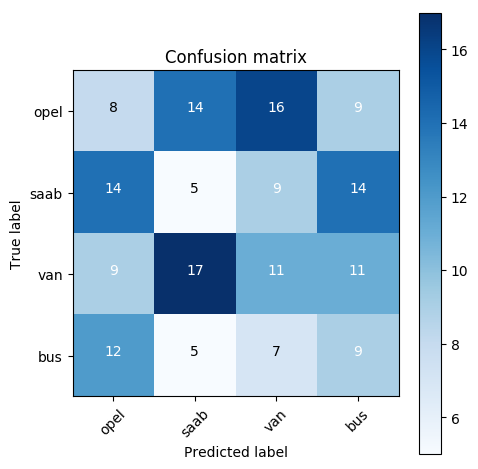

In [0]:
# let's compute the confusion matrix
cnf_matrix = confusion_matrix(test_labels, preds)
print("\n","Confusion matrix for best kNN classifier is : " ,"\n")

plot_confusion_matrix(cnf_matrix,label_names)

Τέλος , θα υπολογίσουμε και θα τυπώσουμε τις μετρικές f1 micro average και f1 macro average .

In [0]:
# let's save the best f1 micro and f1 macro for kNN classifier
temp1 = precision_recall_fscore_support(test_labels, pred, average='micro')
temp2 = precision_recall_fscore_support(test_labels, pred, average='macro')
f1_microkb = temp1[2]
f1_macrokb = temp2[2]

In [0]:
print("")
headings = ['Strategy','Recall','Precision','F1']

print(color.BOLD +"This tables concerns f1 micro average and f1 macro average ! " + color.END ,"\n")
Strategy = ['knn micro','knn macro']
Precision = [temp1[0],temp2[0]]
Recall = [temp1[1],temp2[1]]
F1 = [temp1[2],temp2[2]]

printTable(headings,Strategy,Recall,Precision,F1)
print("")


This tables concerns f1 micro average and f1 macro average !  

+-----------+--------+-----------+-------+
| Strategy  | Recall | Precision |  F1   |
+===========+========+===========+=======+
| knn micro | 0.735  | 0.735     | 0.735 |
+-----------+--------+-----------+-------+
| knn macro | 0.738  | 0.740     | 0.739 |
+-----------+--------+-----------+-------+



### Σύγκριση βέλτιστου kNN  με default kNN
Στο σημείο αυτό θα συγκρίνουμε τον estimator που δημιουργήσαμε στο μέρος Δ με τον default kNN classifier του μέρους Γ.

In [0]:
print("")
headings = ['Strategy','Recall','Precision','F1']
Strategy = ['best knn micro','best knn macro','default knn micro','default knn macro']
Precision = [temp1[0],temp2[0],temp3[0],temp[0]]
Recall = [temp1[1],temp2[1],temp3[1],temp[1]]
F1 = [temp1[2],temp2[2],temp3[2],temp[2]]

printTable(headings,Strategy,Recall,Precision,F1)
print("")


+-------------------+--------+-----------+-------+
|     Strategy      | Recall | Precision |  F1   |
+===================+========+===========+=======+
| best knn micro    | 0.735  | 0.735     | 0.735 |
+-------------------+--------+-----------+-------+
| best knn macro    | 0.738  | 0.740     | 0.739 |
+-------------------+--------+-----------+-------+
| default knn micro | 0.671  | 0.671     | 0.671 |
+-------------------+--------+-----------+-------+
| default knn macro | 0.676  | 0.677     | 0.673 |
+-------------------+--------+-----------+-------+



In [0]:
print("\n","F1 micro gain is "+str((temp1[2]-temp3[2])*100)+" % !","\n")
print("\n","F1 macro gain is "+str((temp2[2]-temp[2])*100)+" % !","\n")


 F1 micro gain is 6.470588235294139 % ! 


 F1 macro gain is 6.501568422499027 % ! 



Παρατηρούμε ότι είχαμε μία αύξηση της τάξης του 7 % μετά τις βελτιστοποιήσεις που πραγματοποιήσαμε ! Οι βελτιστοποιήσεις αυτές έχουν να κάνουν ουσιαστικά με την προεπεξεργασία του dataset μας . Παρατηρούμε λοιπόν ότι η προεπεξεργασία στο dataset μπορεί να έχει αρκετά ευεργετικά αποτελέσματα στην τελική επίδοση του ταξινομητή !

### Χρόνος εκτέλεσης

In [0]:
print("\n","Training time for best kNN is "+str(training)+ " s !","\n")
print("\n","Fit and predict time for best kNN is "+str(fit_predict)+ " s !","\n")


 Training time for best kNN is 16.716778234999765 s ! 


 Fit and predict time for best kNN is 0.005489154999850143 s ! 



Παρατηρούμε ότι το fit και predict γίνεται σε πολύ μικρό χρόνο όπως επίσης και το training !

## Bar plots και σύντομος σχολιασμός 

**Σημείωση** : Μεγάλο μέρος του σχολιασμού έχει πραγματοποιηθεί παραπάνω κατά την βελτιστοποιήση του kNN!

### F1 micro average

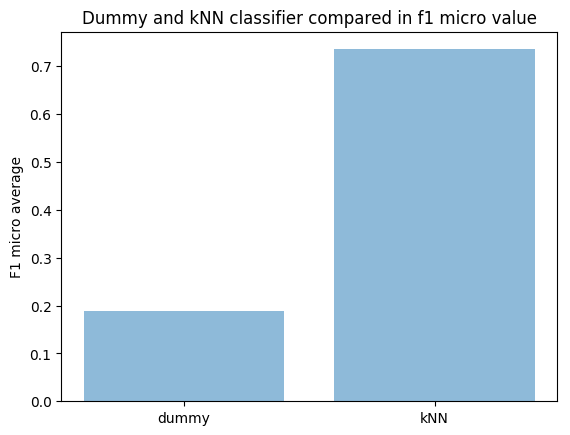

In [0]:
plt.rcdefaults()

classifiers = ('dummy','kNN')
y_pos = np.arange(len(classifiers))
performance = [f1_microdb , f1_microkb]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.ylabel('F1 micro average')
plt.title('Dummy and kNN classifier compared in f1 micro value')
 
plt.show()

### F1 macro average

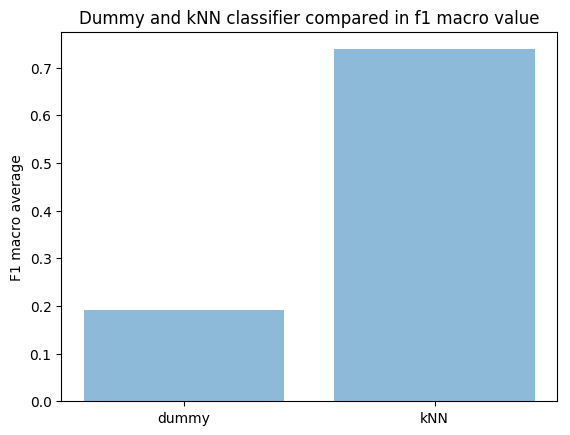

In [0]:
import matplotlib.pyplot as plt
plt.rcdefaults()

classifiers = ('dummy','kNN')
y_pos = np.arange(len(classifiers))
performance = [f1_macrodb , f1_macrokb]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.ylabel('F1 macro average')
plt.title('Dummy and kNN classifier compared in f1 macro value')
 
plt.show()

**Σχολιασμός** : ο dummy classifier όπως ήταν αναμενομενόμενο δεν έχει καθόλου καλό accuracy . Αντίθετα , ο  KΝΝ έχει αρκετά καλή επίδοση . Περισσότερες πληροφορίες σχετικά με τον KNN παρατείθονται παραπάνω στο κομμάτι που αφορά τον kNN